### Imports

In [1]:
import seaborn as sns
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Inspecting the Data

In [2]:
(housing_price:=
 pl.read_csv("./data/Saratoga_NY_Homes.csv")
 )

Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Fireplaces?
i64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,i64
132500,0.09,0,42,50000,0,0,3,4,2,906,35,2,1,1.0,5,1
181115,0.92,0,0,22300,0,0,2,3,2,1953,51,3,0,2.5,6,0
109000,0.19,0,133,7300,0,0,2,3,3,1944,51,4,1,1.0,8,1
155000,0.41,0,13,18700,0,0,2,2,2,1944,51,3,1,1.5,5,1
86060,0.11,0,0,15000,1,1,2,2,3,840,51,2,0,1.0,3,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
289000,0.38,0,32,24200,0,0,2,3,3,2310,61,5,1,2.5,11,1
285000,0.94,0,37,36200,0,0,2,3,3,2564,61,4,1,2.5,11,1
194900,0.39,0,9,20400,0,0,2,2,3,1099,51,2,0,1.0,3,0


In [3]:
housing_price.columns

['Price',
 'Lot.Size',
 'Waterfront',
 'Age',
 'Land.Value',
 'New.Construct',
 'Central.Air',
 'Fuel.Type',
 'Heat.Type',
 'Sewer.Type',
 'Living.Area',
 'Pct.College',
 'Bedrooms',
 'Fireplaces',
 'Bathrooms',
 'Rooms',
 'Fireplaces?']

### Stacking the Predictors

In [5]:
(predictors :=
 housing_price
 .unpivot(index='Price',
          variable_name='predictor',
          value_name='label')
 .to_pandas()
)

,Price,predictor,label
0,132500,Lot.Size,0.09
1,181115,Lot.Size,0.92
2,109000,Lot.Size,0.19
3,155000,Lot.Size,0.41
4,86060,Lot.Size,0.11
...,...,...,...
27643,289000,Fireplaces?,1.00
27644,285000,Fireplaces?,1.00
27645,194900,Fireplaces?,0.00
27646,125000,Fireplaces?,1.00


### Visualizing the Predictors without and with a Smoother
  1. Without a smoother
  2. With a smoother

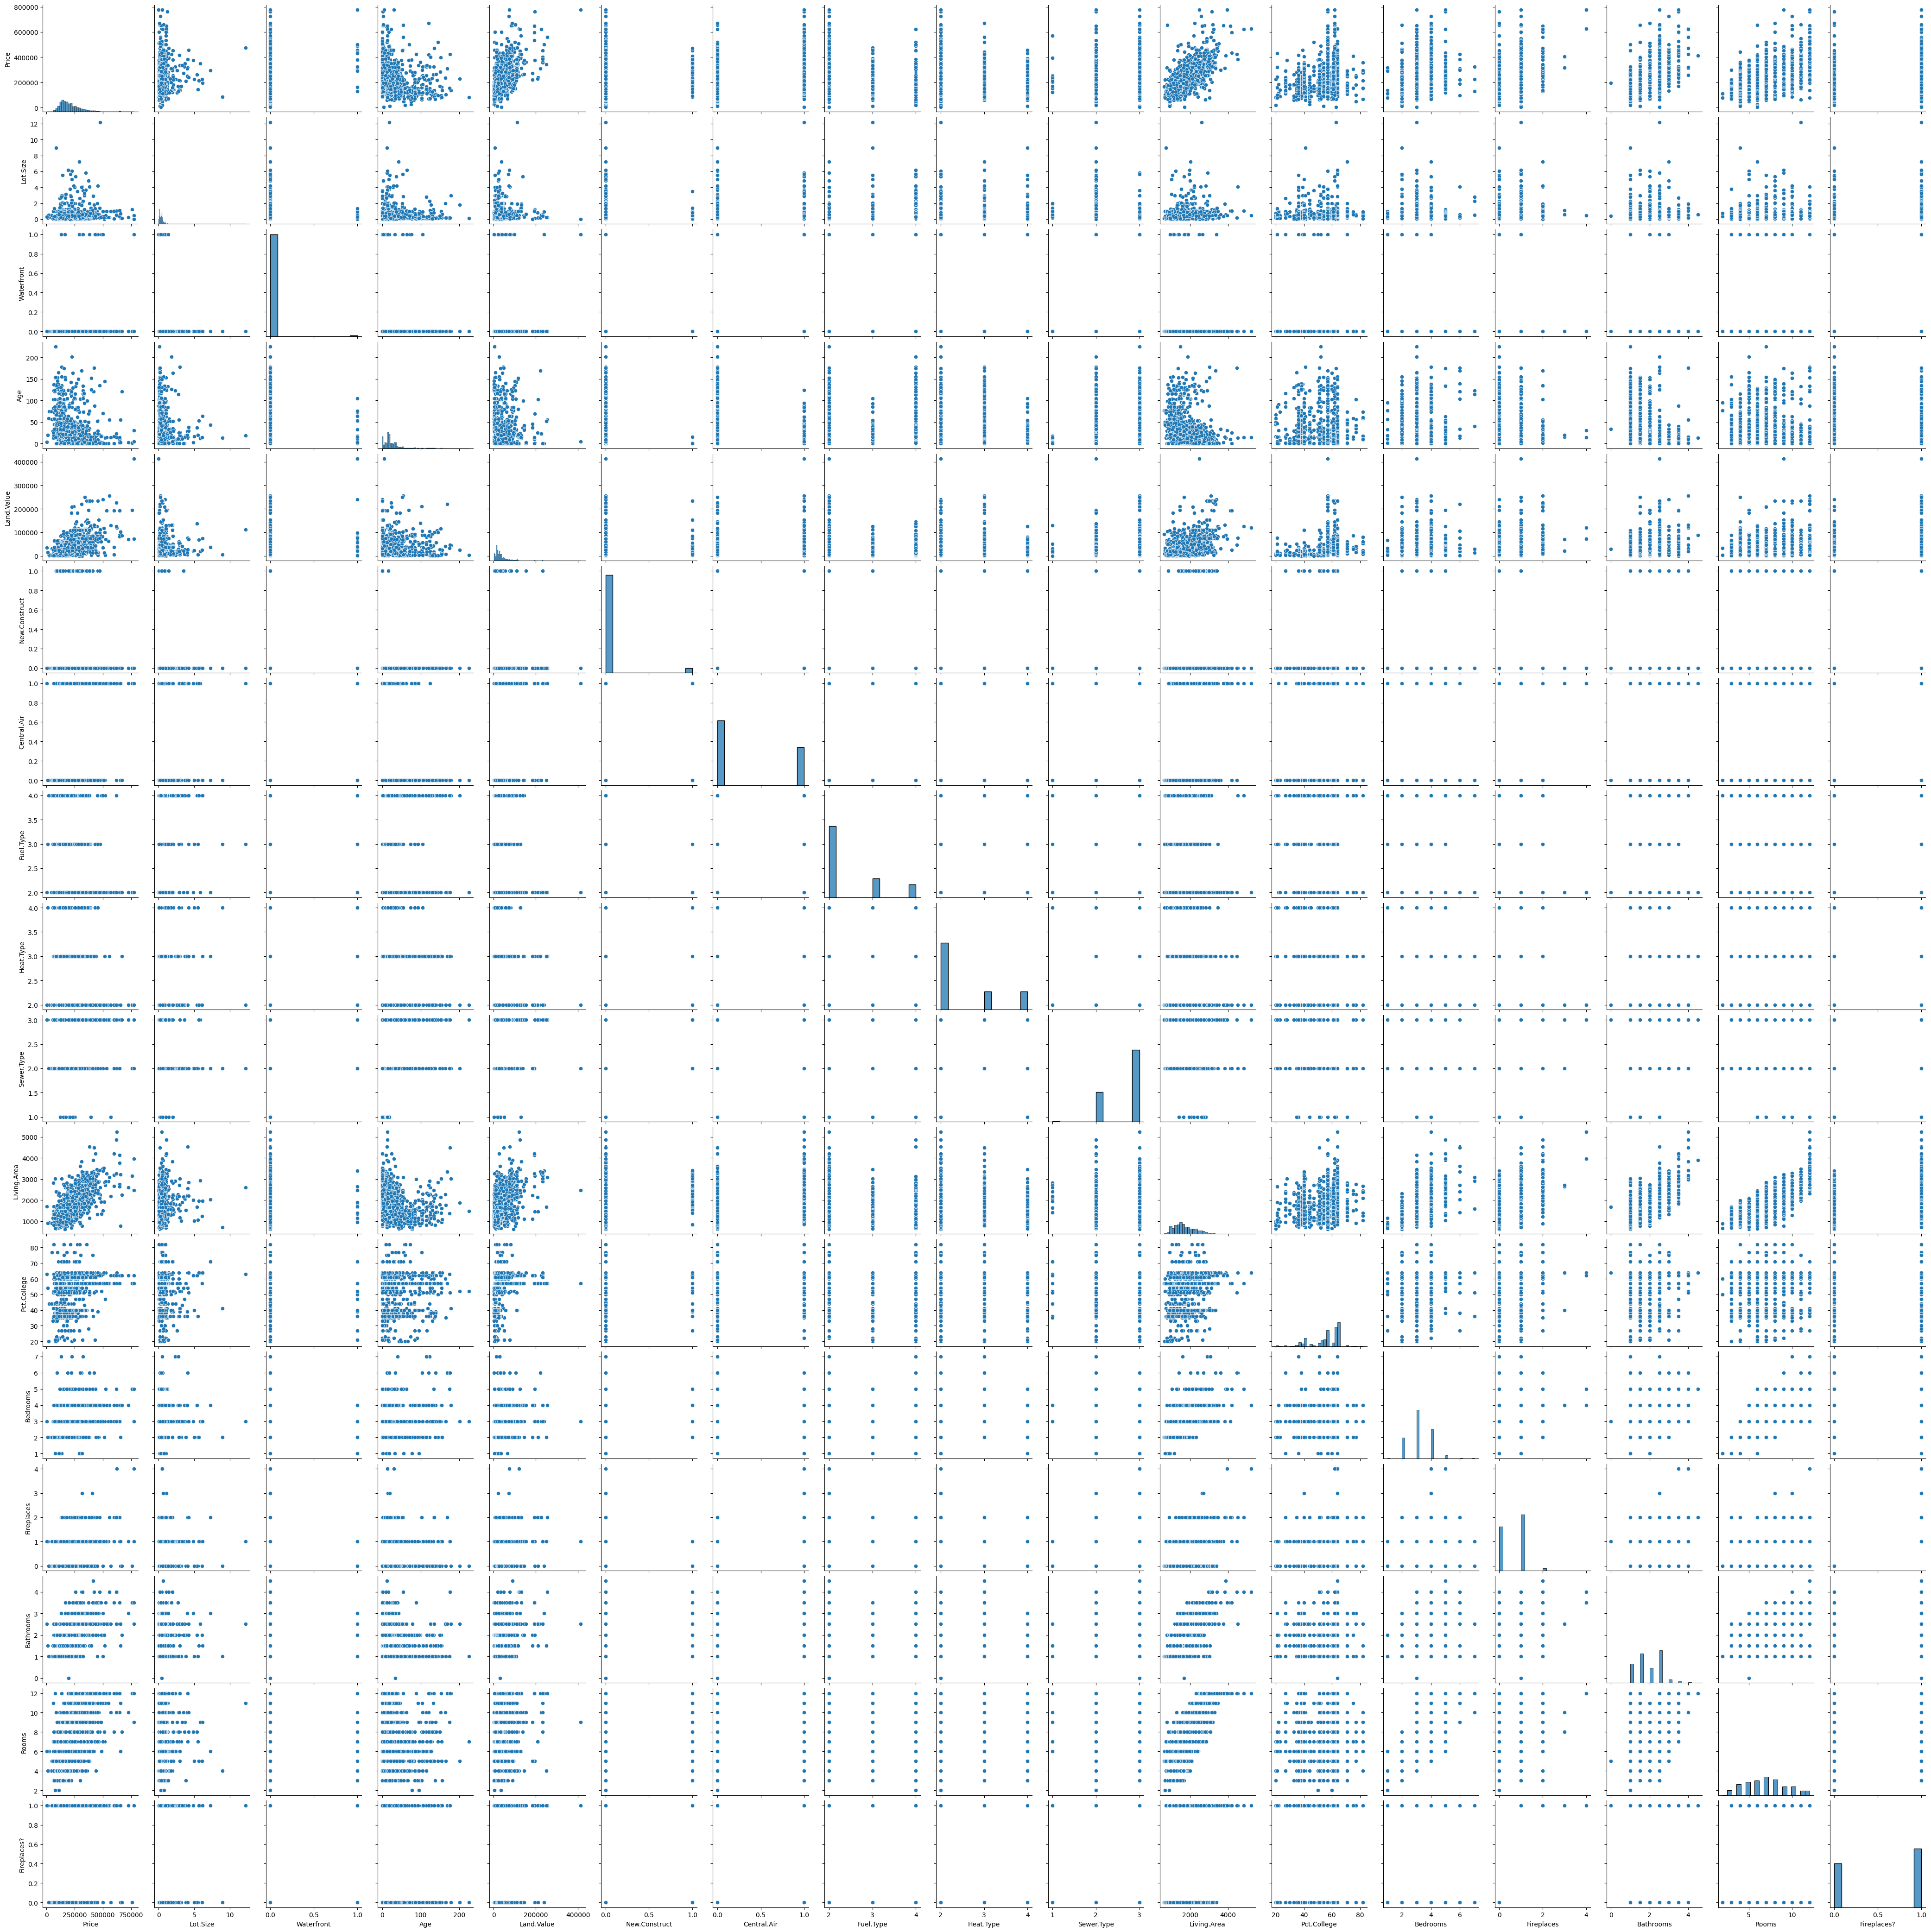

In [6]:
sns.pairplot(housing_price.to_pandas())
# without a smoother

/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.12/dist-packages/statsmodels/nonparam

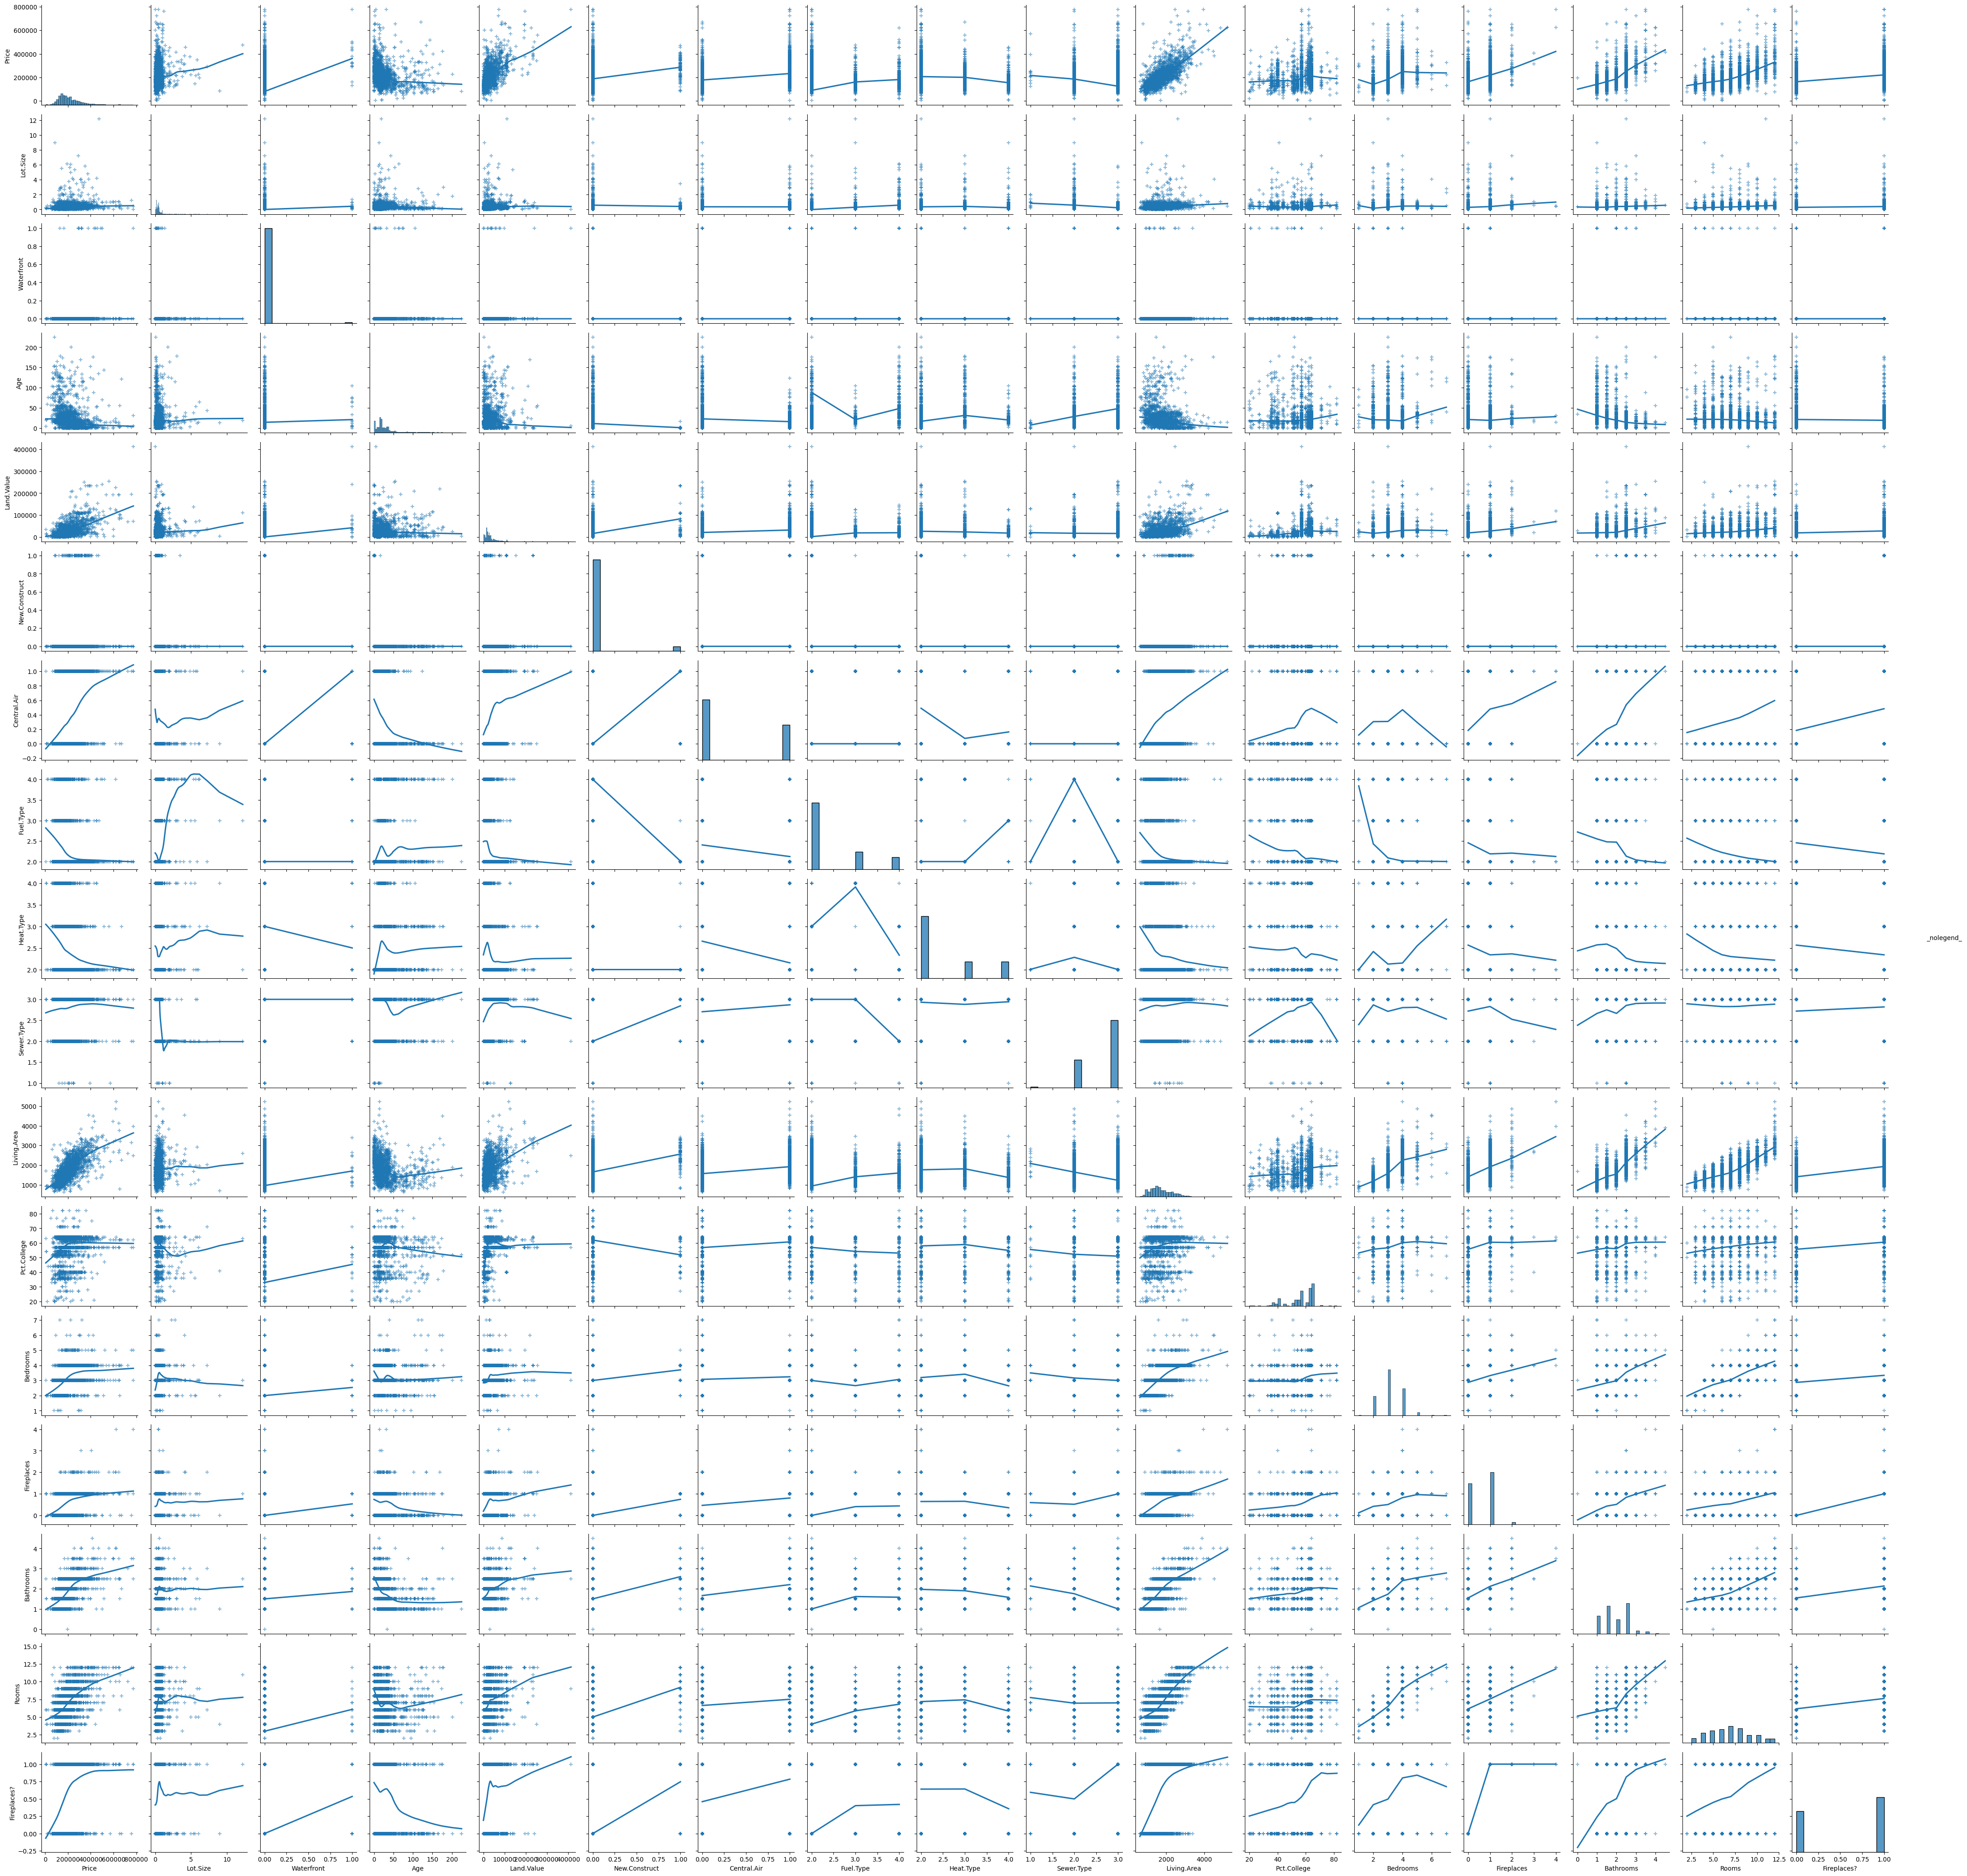

In [7]:
g = sns.PairGrid(housing_price.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()
# with a smoother

### Exclude 'Fireplaces?' predictor as it caused issues in previous plots

/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.12/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


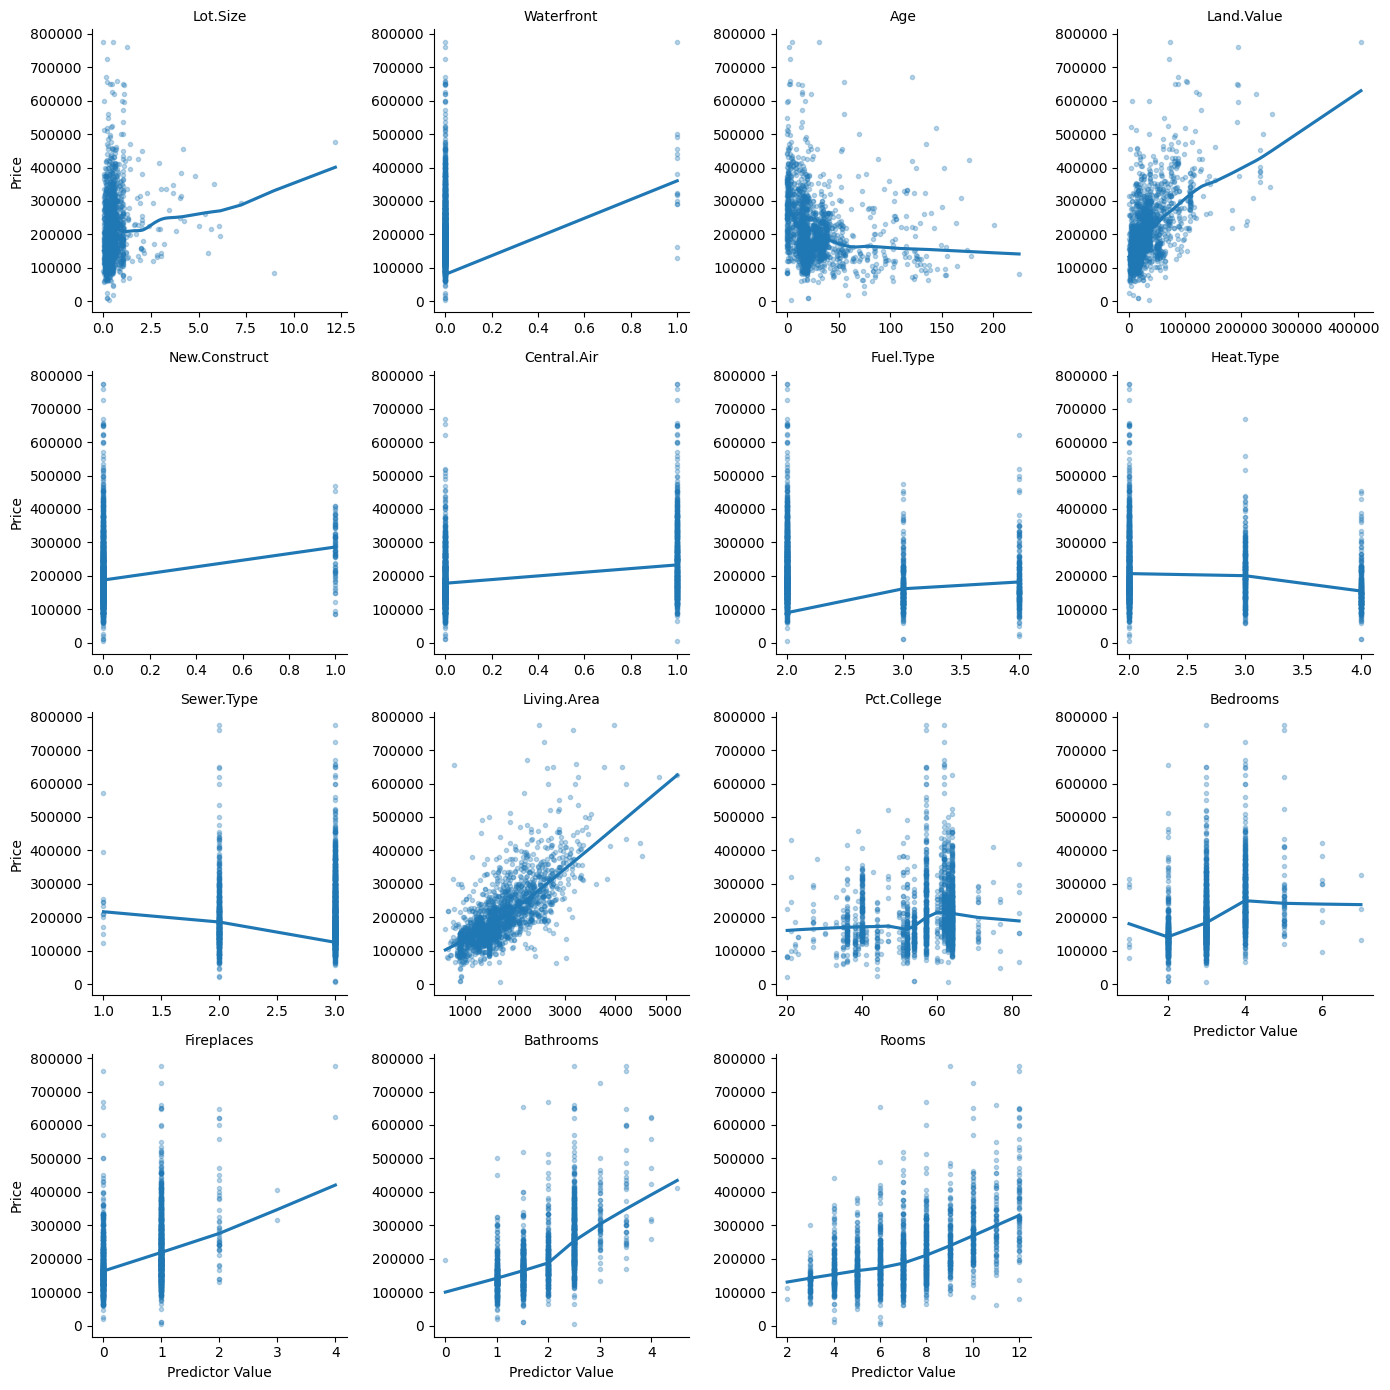

In [10]:
predictors_filtered = predictors[predictors['predictor'] != 'Fireplaces?']

g = sns.FacetGrid(predictors_filtered, col="predictor", col_wrap=4, sharex=False, sharey=False, height=3.5)
g.map(sns.regplot, "label", "Price", lowess=True, marker=".", scatter_kws={'alpha': 0.3})
g.set_axis_labels("Predictor Value", "Price");
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

# OLS Model Summary

In [15]:
model = sm.OLS(y, X)
results = model.fit()
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     321.2
Date:                Wed, 21 Jan 2026   Prob (F-statistic):               0.00
Time:                        04:17:16   Log-Likelihood:                -21466.
No. Observations:                1728   AIC:                         4.295e+04
Df Residuals:                    1718   BIC:                         4.301e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.051e+04   9754.031      2.102      0.036    1376.469    3.96e+04
x1          7277.5725   2112.654      3.445      0.001    3133.927    1.14e+04
x2          -117.8220     55.010     -2.142      0.032    -225.715      -9.929
x3             0.9495      0.047     20.293      0.000       0.858       1.041
x4            68.7716      4.733     14.530      0.000      59.488      78.055
x5            10.4541    148.182      0.071      0.944    -280.182     301.090
x6         -9975.0873   2600.667     -3.836      0.000   -1.51e+04   -4874.280
x7          3637.4820   3049.791      1.193      0.233   -2344.213    9619.177
x8          2.429e+04   3412.124      7.120      0.000    1.76e+04     3.1e+04
x9          2860.2219    993.456      2.879      0.004     911.711    4808.733
==============================================================================
Omnibus:                      603.380   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4248.628
Skew:                           1.454   Prob(JB):                         0.00
Kurtosis:                      10.110   Cond. No.                     3.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Summary

The OLS model explains about 62.7% of the variation in housing prices, indicating a reasonably good fit. Key predictors like Lot Size, Land Value, Living Area, Bathrooms, and Rooms significantly influence price, with Age and Bedrooms having a negative impact. However, Pct.College and Fireplaces did not show a statistically significant relationship with price in this model. There is a presence of a strong multicollinearity, which suggests that some independent variables are highly correlated with each other and could affect the interpretation of individual coefficients.

The strongest predictors of a home's price are Living Area, Land Value, and the number of Bathrooms and Rooms, all of which show a clear upward trend where larger or better-equipped homes cost more. Features like Waterfront locations and New Construction also show a significant positive impact on price, though they are less common in the dataset. Conversely, some factors like Age and Sewer Type show a slight downward or neutral trend, suggesting that older homes or certain utility types may correlate with lower market values. Overall, the data confirms that physical size and high-end amenities are the primary drivers of real estate pricing in this set.